In [1]:
cd ../

/Users/creator/Projects/CS6241


In [2]:
from fairrecs.preprocessor import preprocess_yow
from fairrecs.solver import Solver
from fairrecs.dp_solver import DPSolver
from fairrecs.dt_solver import DTSolver
from fairrecs.di_solver import DISolver
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import seaborn as sns
import pandas as pd

In [18]:
dataset = preprocess_yow('datasets/yow_userstudy_raw.csv')

In [4]:
df = pd.read_csv('datasets/yow_userstudy_raw.csv')

# remove NaN values
clds = df[df['classes'].notna()]

# get 'people' topics
txds = clds[clds['classes'].str.contains("people")]

# select two most popular RSS IDs
top2_RSS_ID = txds.RSS_ID.value_counts().nlargest(2).to_dict()

top1 = list(top2_RSS_ID.keys())[0]
top2 = list(top2_RSS_ID.keys())[1]

top1_df = txds.loc[txds['RSS_ID'] == top1]
top2_df = txds.loc[txds['RSS_ID'] == top2]

In [5]:
top1

8157

In [6]:

    final_df = pd.concat([top1_df, top2_df])

In [7]:
final_df

,EventOnScroll,MSecForDownArrow,TimeOnVScroll,relevant,NumOfPageUp,TimeOnMouse,NumOfPageDown,ClickOnWindow,log_id,serverTimeVisit,...,readability,TimeOnHScroll,novelty,user_like,DOC_ID,TimeOnPage,TimeVisit,user_id,NumOfDownArrow,authority
9780,0.0,0.0,0.0,3.0,0,2156,0.0,0.0,5851,2004-05-02 18:40,...,1.0,0.0,2.0,3,295842,106781.0,2004-05-02 18:40,92,0.0,1.0
9781,0.0,0.0,0.0,2.0,0,3934,0.0,0.0,5855,2004-05-02 18:42,...,1.0,0.0,4.0,4,282679,129141.0,2004-05-02 18:42,92,0.0,1.0
9782,0.0,0.0,0.0,2.0,0,4280,0.0,1.0,5861,2004-05-02 18:45,...,1.0,0.0,2.0,3,295838,107500.0,2004-05-02 18:45,92,0.0,1.0
9784,0.0,0.0,0.0,2.0,0,3339,0.0,0.0,5868,2004-05-02 18:50,...,1.0,0.0,2.0,4,281594,147469.0,2004-05-02 18:50,92,0.0,1.0
9785,0.0,0.0,0.0,3.0,0,4561,0.0,1.0,5872,2004-05-02 18:53,...,1.0,0.0,2.0,4,294299,178390.0,2004-05-02 18:53,92,0.0,1.0
9786,0.0,0.0,0.0,3.0,0,141,0.0,2.0,5877,2004-05-02 19:00,...,1.0,0.0,2.0,4,292316,271813.0,2004-05-02 19:00,92,0.0,1.0
9787,0.0,0.0,0.0,4.0,0,4911,0.0,0.0,5887,2004-05-02 19:07,...,1.0,0.0,3.0,4,281592,178092.0,2004-05-02 19:07,92,0.0,1.0
9788,0.0,0.0,0.0,2.0,0,2565,0.0,0.0,5896,2004-05-02 19:12,...,1.0,0.0,2.0,4,288380,101453.0,2004-05-02 19:12,92,0.0,1.0
9789,1.0,0.0,0.0,4.0,0,1374,0.0,0.0,5901,2004-05-02 19:16,...,1.0,0.0,3.0,4,288390,195141.0,2004-05-02 19:16,92,0.0,1.0
9847,0.0,0.0,0.0,4.0,0,1077,0.0,1.0,7447,2004-05-05 21:57,...,1.0,0.0,2.0,4,301715,57687.0,2004-05-05 21:57,92,0.0,1.0


In [8]:
counts_top1 = final_df.loc[final_df['RSS_ID']== top1]['relevant'].value_counts().sort_index(axis=0)
counts_top2 = final_df.loc[final_df['RSS_ID']== top2]['relevant'].value_counts().sort_index(axis=0)

In [9]:
print(counts_top1)
print(counts_top2)

2.0    8
3.0    8
4.0    8
Name: relevant, dtype: int64
2.0    3
3.0    6
4.0    4
Name: relevant, dtype: int64


In [10]:
ct1 = np.zeros([5])
ct1[1:4] = counts_top1
ct2 = np.zeros([5])
ct2[1:4] = counts_top2

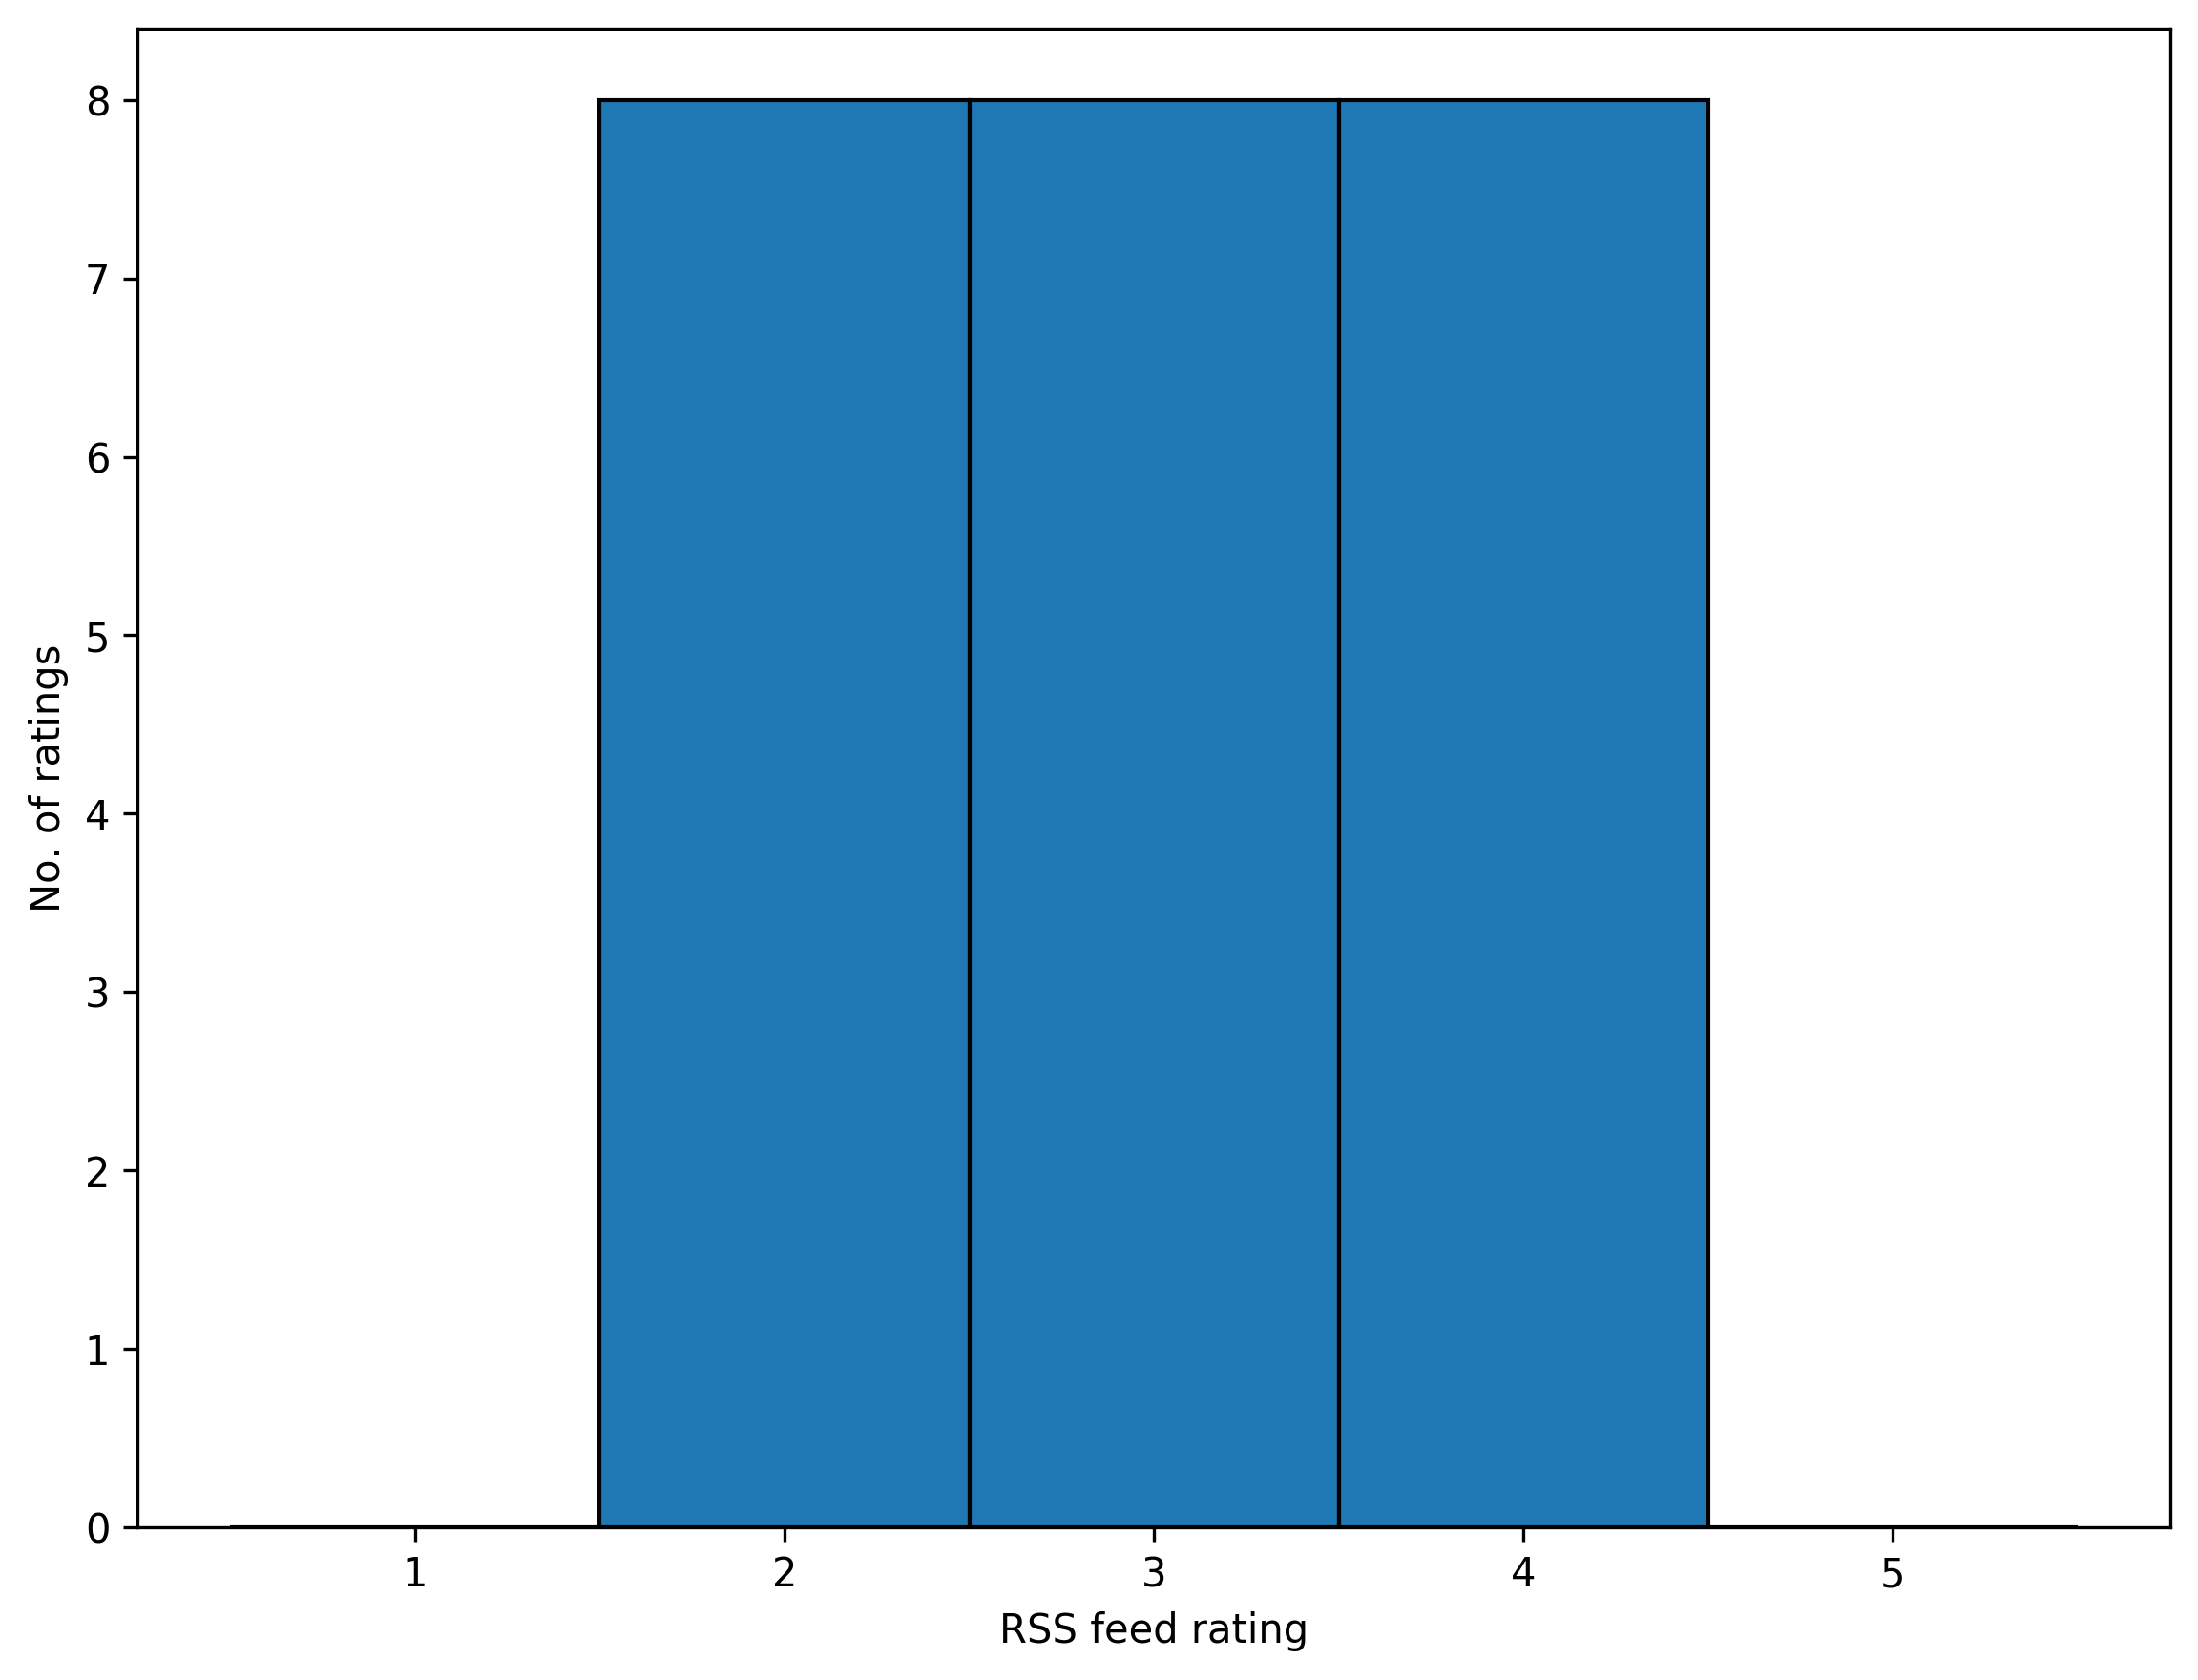

In [11]:
x = np.arange(1,6)
y = ct1
plt.figure(num=None, figsize=(8, 6), dpi=300)
plt.xlabel('RSS feed rating')
plt.ylabel('No. of ratings')
plt.tight_layout(True)
plt.hist(x, bins=(np.arange(1,7)-0.5), weights=y, ec='k')
plt.show()

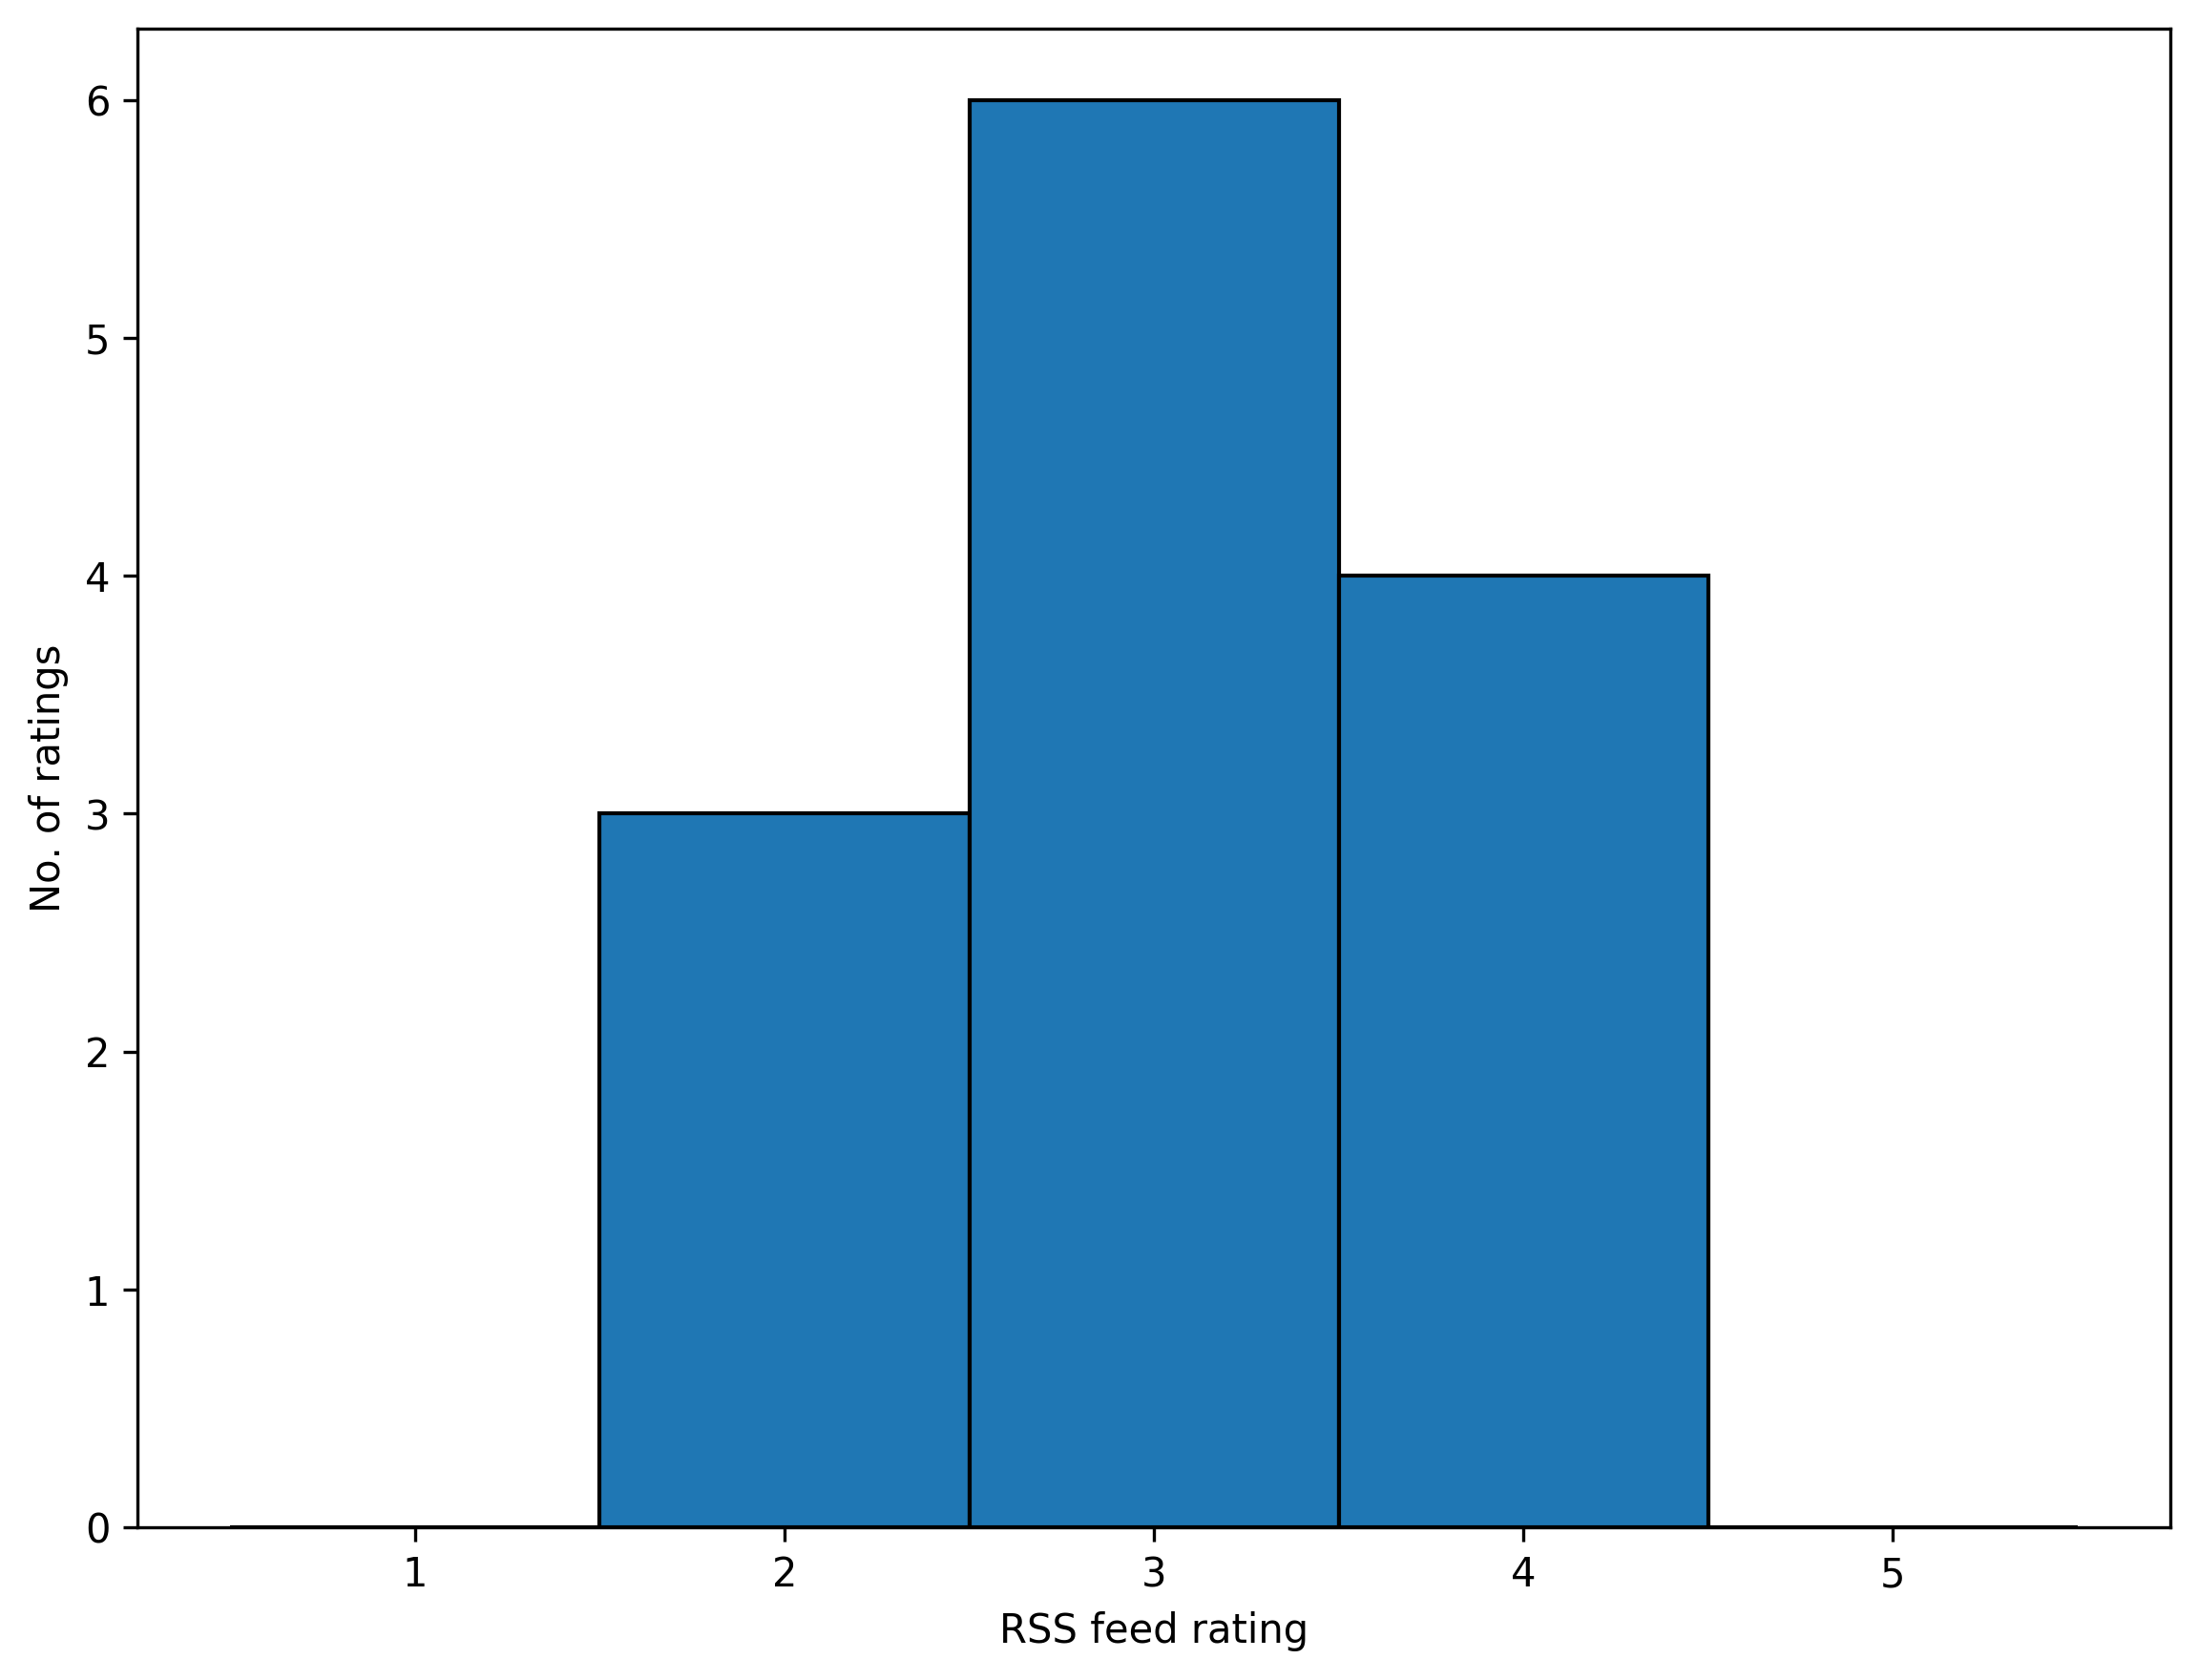

In [12]:
x = np.arange(1,6)
y = ct2
plt.figure(num=None, figsize=(8, 6), dpi=300)
plt.xlabel('RSS feed rating')
plt.ylabel('No. of ratings')
plt.tight_layout(True)
plt.hist(x, bins=(np.arange(1,7)-0.5), weights=y, ec='k')
plt.show()

In [13]:
ct2_avg = np.average(np.arange(1,6), weights=ct2)
ct2_var = np.average((np.arange(1,6) - ct2_avg)**2, weights=ct2)
print("Drama mean: ", ct2_avg)
print("Drama var: ", ct2_var)

Drama mean:  3.076923076923077
Drama var:  0.5325443786982249


In [14]:
ct1_avg = np.average(np.arange(1,6), weights=ct1)
ct1_var = np.average((np.arange(1,6) - ct1_avg)**2, weights=ct1)
print("Drama mean: ", ct1_avg)
print("Drama var: ", ct1_var)

Drama mean:  3.0
Drama var:  0.6666666666666666


In [15]:
import numpy as np
from fairrecs.preprocessor import preprocess_yow
from fairrecs.solver import Solver
from fairrecs.dp_solver import DPSolver
from fairrecs.dt_solver import DTSolver
from fairrecs.di_solver import DISolver
from fairrecs.utils.cof import cost_of_fairness as cof
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import seaborn as sns

In [19]:
# Configuration
sns.set_palette('colorblind')

solver = Solver(dataset['relevant'].to_numpy())
P = solver.solve()

solver_dp = DPSolver(dataset['relevant'].to_numpy(), dataset['RSS_ID'].to_numpy())
P_dp = solver_dp.solve()

solver_dt = DTSolver(dataset['relevant'].to_numpy(), dataset['RSS_ID'].to_numpy())
P_dt = solver_dt.solve()

solver_di = DISolver(dataset['relevant'].to_numpy(), dataset['RSS_ID'].to_numpy())
P_di = solver_di.solve()

u = dataset['relevant'].to_numpy()
v = np.array([1.0 / (np.log(2 + i)) for i, _ in enumerate(u)])


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -1.519e+01  -1.384e+03  +1e+03  7e-03  8e-17  1e+00  5e-01    ---    ---    1  1  - |  -  - 
 1  -1.519e+01  -3.106e+01  +2e+01  8e-05  6e-11  1e-02  6e-03  0.9883  1e-04   0  0  0 |  0  0
 2  -1.519e+01  -1.536e+01  +2e-01  9e-07  4e-12  1e-04  7e-05  0.9890  1e-04   0  0  0 |  0  0
 3  -1.519e+01  -1.519e+01  +2e-03  1e-08  8e-14  1e-06  7e-07  0.9890  1e-04   1  0  0 |  0  0
 4  -1.519e+01  -1.519e+01  +2e-05  1e-10  1e-15  1e-08  8e-09  0.9890  1e-04   1  0  0 |  0  0
 5  -1.519e+01  -1.519e+01  +2e-07  1e-12  1e-16  1e-10  9e-11  0.9890  1e-04   3  0  0 |  0  0
 6  -1.519e+01  -1.519e+01  +3e-09  1e-14  8e-16  2e-12  1e-12  0.9890  1e-04   8  0  0 |  0  0

OPTIMAL (within feastol=1.3e-14, reltol=1.8e-10, abstol=2.8e-09).
Runtime: 0.007225 seconds.



IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
print("Expected utility: ", solver.expected_utility())
print("Demographic parity expected utility: ", solver_dp.expected_utility())
print("Cost of fairness: ", cof(u, P, P_dp, v))
print("Disparate treatment expected utility: ", solver_dt.expected_utility())
print("Cost of fairness: ", cof(u, P, P_dt, v))
print("Expected utility: ", solver.expected_utility())
print("Disparate impact expected utility: ", solver_di.expected_utility())

In [ ]:
solver_dpa = DPSolver(dataset['relevant'].to_numpy(), dataset['RSS_ID'].to_numpy())
solver_dta = DTSolver(dataset['relevant'].to_numpy(), dataset['RSS_ID'].to_numpy())
solver_dia = DISolver(dataset['relevant'].to_numpy(), dataset['RSS_ID'].to_numpy())
count = 10
X = 1 - np.logspace(3,1,count)/2000
Y = np.zeros([count, 3])
C = np.zeros([count, 3])
for i, alpha in enumerate(X):
    if i % 3 == 1:
        print("Round ", i)
    solver_dpa.alpha = alpha
    solver_dta.alpha = alpha
    solver_dia.alpha = alpha
    P_dpa = solver_dpa.solve()
    P_dta = solver_dta.solve()
    P_dia = solver_dia.solve()
    Y[i, 0] = solver_dpa.expected_utility()
    Y[i, 1] = solver_dta.expected_utility()
    Y[i, 2] = solver_dia.expected_utility()
    C[i, 0] = cof(u, P, P_dpa, v)
    C[i, 1] = cof(u, P, P_dta, v)
    C[i, 2] = cof(u, P, P_dia, v)

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=300)
plot(X, C[:,0], label="Demographic parity")
plot(X, C[:,1], label="Disparate treatment")
plot(X, C[:,2], label="Disparate impact")
plt.xlabel('Alpha (Percent disparity)')
plt.ylabel('Cost of fairness')
plt.legend()
plt.show()

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=300)
plt.ticklabel_format(useOffset=False)
plot(X, Y[:,0], label="Demographic parity")
plot(X, Y[:,1], label="Disparate treatment")
plot(X, Y[:,2], label="Disparate impact")
plt.xlabel('Alpha (Percent disparity)')
plt.ylabel('Average utility')
plt.legend()
plt.show()